In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### ANALISI ESPLORATIVA DATASET RATING USER x ITEM

In [2]:
col = ['user', 'item', 'rating', 'timestamp']
df = pd.read_csv("ml-100k/u.data", sep='\t', names=col)
df.head()

,user,item,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user       100000 non-null  int64
 1   item       100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [4]:
df.nunique()

user           943
item          1682
rating           5
timestamp    49282
dtype: int64

Text(0, 0.5, 'Numero di elementi univoci')

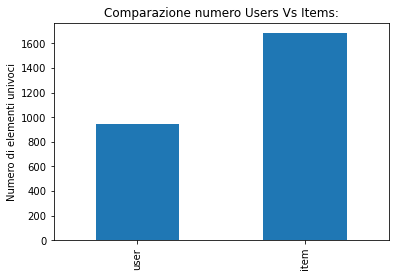

In [5]:
df[["user", "item"]].nunique().plot(kind="bar")

plt.title('Comparazione numero Users Vs Items:')
plt.ylabel('Numero di elementi univoci')

In [6]:
df.rating.mean()

3.52986

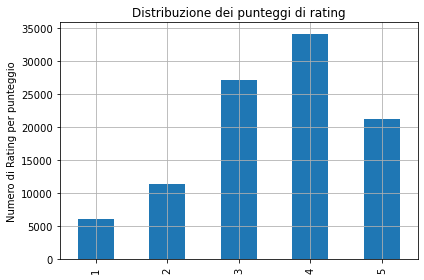

In [7]:
df.rating.value_counts().sort_index().plot(kind='bar')

plt.title('Distribuzione dei punteggi di rating')
plt.ylabel('Numero di Rating per punteggio')
plt.grid()
plt.tight_layout()

# COME SI PUò VEDERE ABBIAMO UNA PREPONDERANZA DI RECENSIONI POSITIVE 
# QUINDI DOVREBBE ESSERE PIU FACILE ESCLUDERE CHE CONSIGLIARE

print(df.rating.mean())

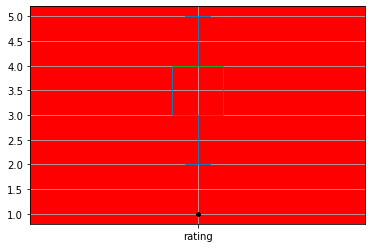

In [8]:
rating_boxplot = df.rating.plot.box(vert=True, sym='k.')
rating_boxplot.set_facecolor('r')

plt.grid(True)
plt.box(True)

In [9]:
df["rating"].describe()

count    100000.000000
mean          3.529860
std           1.125674
min           1.000000
25%           3.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

In [10]:
df.value_counts("user").sort_values(ascending=False)[0:10]

user
405    737
655    685
13     636
450    540
276    518
416    493
537    490
303    484
234    480
393    448
dtype: int64

Text(0, 0.5, 'Numero di Rating')

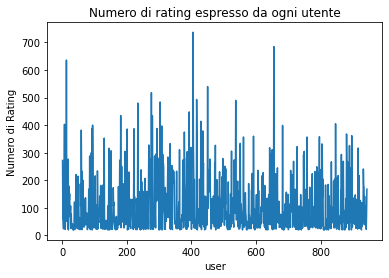

In [11]:
df.value_counts("user").sort_index().plot(kind="line")

plt.title('Numero di rating espresso da ogni utente')
plt.ylabel('Numero di Rating')

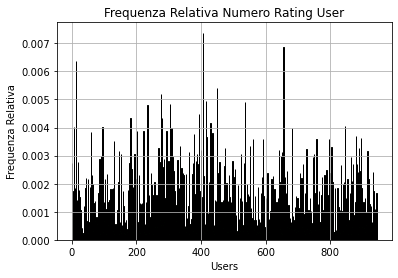

In [12]:
df.user.hist(
    bins=943,
    edgecolor='k',
    facecolor='green',
    density=True #Frequenza Relativa
)

plt.title("Frequenza Relativa Numero Rating User")
plt.ylabel('Frequenza Relativa')
plt.xlabel('Users')
# plt.xticks(range(60, 300, 20))
plt.grid(True)
plt.box(True)

Text(0, 0.5, 'Numero di Rating')

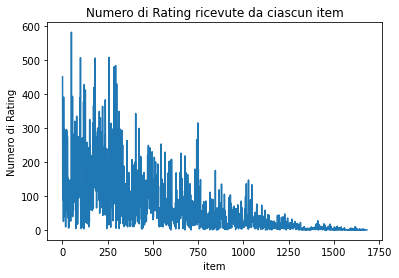

In [13]:
df.value_counts("item").sort_index().plot(kind="line")

plt.title('Numero di Rating ricevute da ciascun item')
plt.ylabel('Numero di Rating')

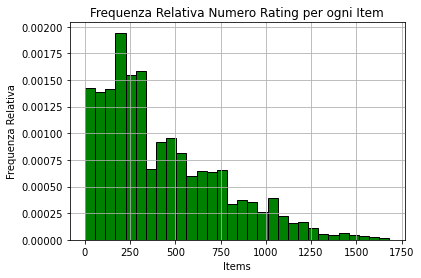

In [14]:
df.item.hist(
    bins=30,
    edgecolor='k',
    facecolor='green',
    density=True #Frequenza Relativa
)

plt.title("Frequenza Relativa Numero Rating per ogni Item")
plt.ylabel('Frequenza Relativa')
plt.xlabel('Items')
# plt.xticks(range(60, 300, 20))
plt.grid(True)
plt.box(True)

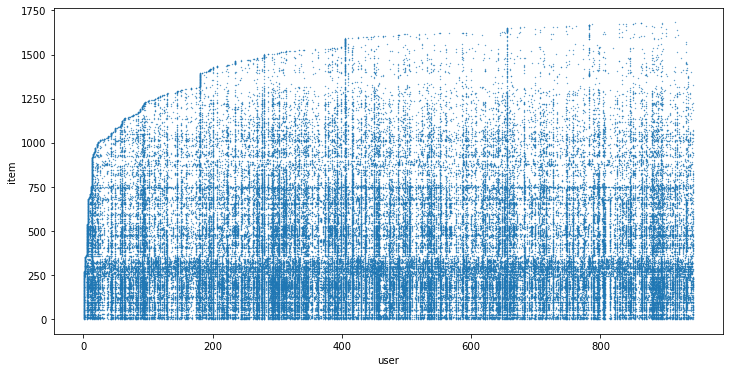

In [15]:
df[["user", "item"]].plot.scatter(x="user", y="item", s=0.1)

plt.rcParams.update({'font.size': 12})
fig = plt.gcf()
fig.set_size_inches(12, 6)

## DATASET ITEM

In [16]:
item_col = ["movie_id","movie_title","release_date","video_release_date",
"IMDb_URL","unknown","Action","Adventure","Animation",
"Children's","Comedy","Crime","Documentary","Drama","Fantasy",
"Film_Noir","Horror","Musical","Mystery","Romance","Sci_Fi",
"Thriller","War","Western"]


item_df = pd.read_csv("ml-100k/u.item", sep='|', names = item_col, encoding='latin-1')
item_df.head()

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film_Noir,Horror,Musical,Mystery,Romance,Sci_Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [17]:
item_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_id            1682 non-null   int64  
 1   movie_title         1682 non-null   object 
 2   release_date        1681 non-null   object 
 3   video_release_date  0 non-null      float64
 4   IMDb_URL            1679 non-null   object 
 5   unknown             1682 non-null   int64  
 6   Action              1682 non-null   int64  
 7   Adventure           1682 non-null   int64  
 8   Animation           1682 non-null   int64  
 9   Children's          1682 non-null   int64  
 10  Comedy              1682 non-null   int64  
 11  Crime               1682 non-null   int64  
 12  Documentary         1682 non-null   int64  
 13  Drama               1682 non-null   int64  
 14  Fantasy             1682 non-null   int64  
 15  Film_Noir           1682 non-null   int64  
 16  Horror

In [18]:
item_df.describe()

,movie_id,video_release_date,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Fantasy,Film_Noir,Horror,Musical,Mystery,Romance,Sci_Fi,Thriller,War,Western
count,1682.000000,0.0,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,...,1682.00000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000
mean,841.500000,NaN,0.001189,0.149227,0.080262,0.024970,0.072533,0.300238,0.064804,0.029727,...,0.01308,0.014269,0.054697,0.033294,0.036266,0.146849,0.060048,0.149227,0.042212,0.016052
std,485.695893,NaN,0.034473,0.356418,0.271779,0.156081,0.259445,0.458498,0.246253,0.169882,...,0.11365,0.118632,0.227455,0.179456,0.187008,0.354061,0.237646,0.356418,0.201131,0.125714
min,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,421.250000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,841.500000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1261.750000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1682.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## USER DATASET

In [19]:
user_col = ["user_id", "age", "gender", "occupation", "zip_code"]

user_df = pd.read_csv("ml-100k/u.user", sep='|', names=user_col)
user_df.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [20]:
user_df.describe()

,user_id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


In [21]:
user_df.occupation.unique()

array(['technician', 'other', 'writer', 'executive', 'administrator',
       'student', 'lawyer', 'educator', 'scientist', 'entertainment',
       'programmer', 'librarian', 'homemaker', 'artist', 'engineer',
       'marketing', 'none', 'healthcare', 'retired', 'salesman', 'doctor'],
      dtype=object)

## MERGED DATASET

In [22]:
merged_df = pd.merge(df, item_df, left_on='item', right_on='movie_id')
merged_df.head()

,user,item,rating,timestamp,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,...,Fantasy,Film_Noir,Horror,Musical,Mystery,Romance,Sci_Fi,Thriller,War,Western
0,196,242,3,881250949,242,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,...,0,0,0,0,0,0,0,0,0,0
1,63,242,3,875747190,242,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,...,0,0,0,0,0,0,0,0,0,0
2,226,242,5,883888671,242,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,...,0,0,0,0,0,0,0,0,0,0
3,154,242,3,879138235,242,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,...,0,0,0,0,0,0,0,0,0,0
4,306,242,5,876503793,242,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,...,0,0,0,0,0,0,0,0,0,0


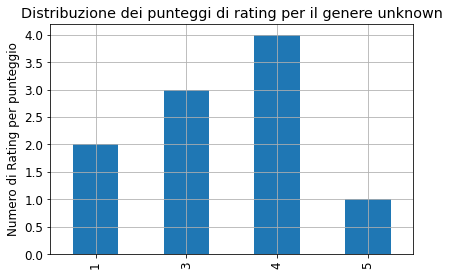

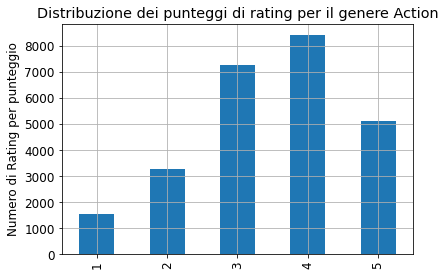

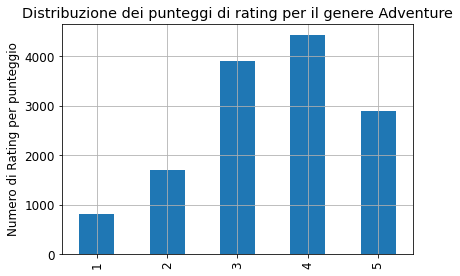

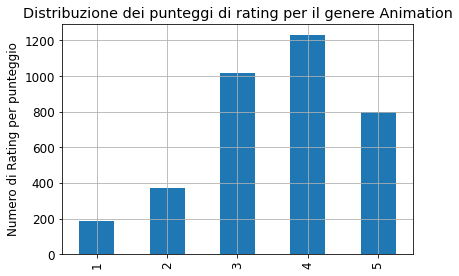

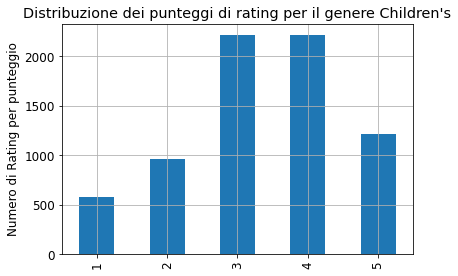

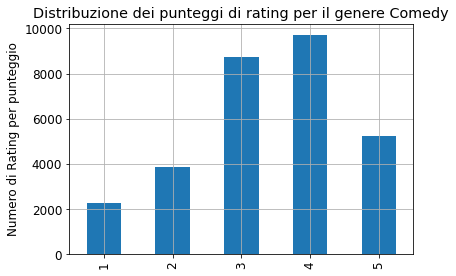

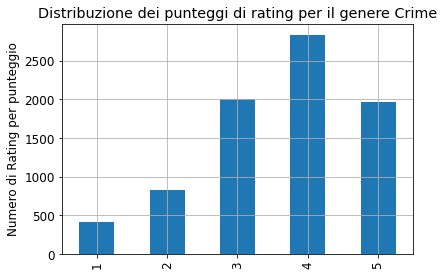

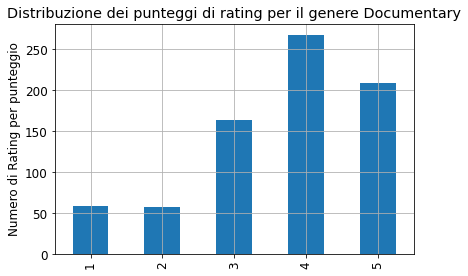

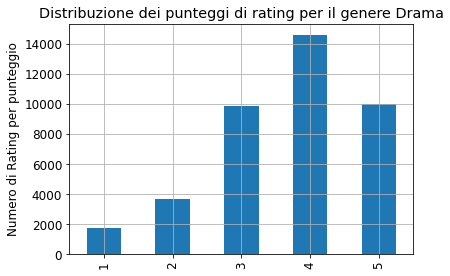

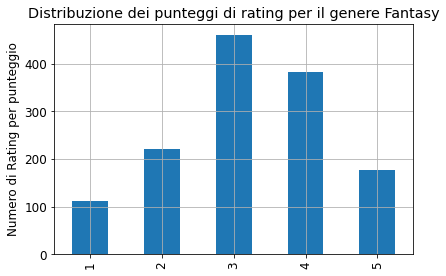

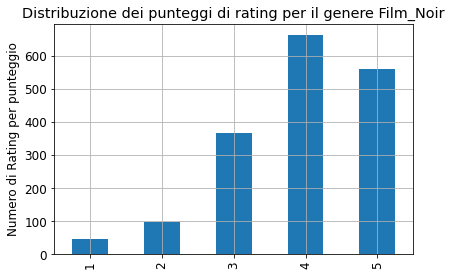

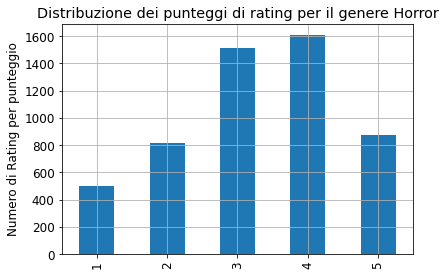

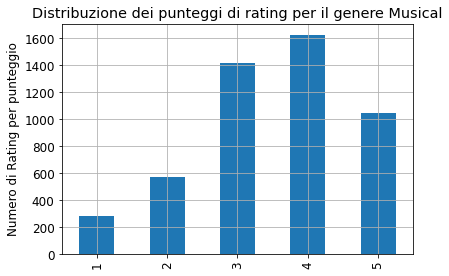

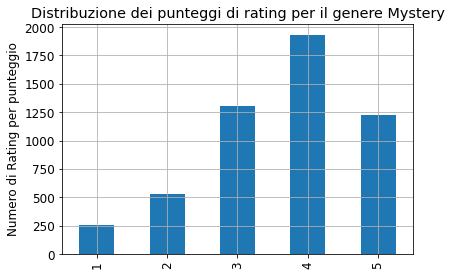

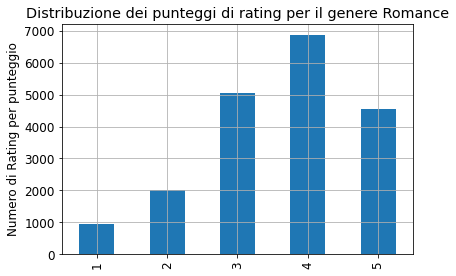

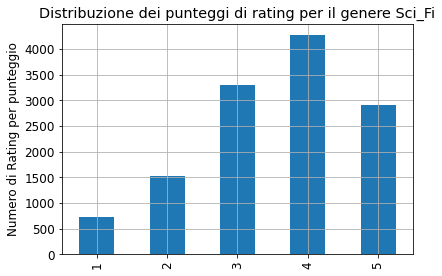

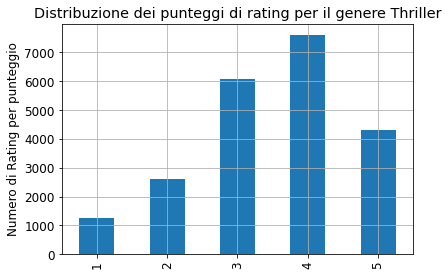

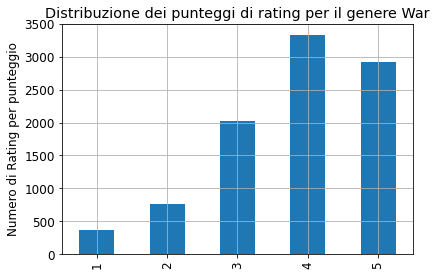

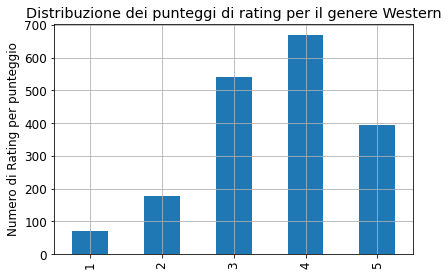

In [23]:
genres = ["unknown","Action","Adventure","Animation",
"Children's","Comedy","Crime","Documentary","Drama","Fantasy",
"Film_Noir","Horror","Musical","Mystery","Romance","Sci_Fi",
"Thriller","War","Western"]

for g in genres:
    plt.figure()
    selected = merged_df[merged_df[g] == 1]
    selected.rating.value_counts().sort_index().plot(kind='bar')
    plt.title('Distribuzione dei punteggi di rating per il genere ' + str(g))
    plt.ylabel('Numero di Rating per punteggio')
    plt.grid()
    plt.tight_layout()
    
    # Show/save figure as desired.
plt.show()
# Can show all four figures at once by calling plt.show() here, outside the loop.
#plt.show()
    

In [24]:
rating_mean = {}

rating_mean['genres'] = ["All"]
rating_mean['mean_rating'] = [merged_df.rating.mean()]
rating_mean['number'] = [merged_df.item.nunique()]
rating_mean['rating_number'] = [merged_df.item.count()]
rating_mean['rating_number_ratio'] = [merged_df.item.count()/merged_df.item.nunique()]

genres = ["unknown","Action","Adventure","Animation",
"Children's","Comedy","Crime","Documentary","Drama","Fantasy",
"Film_Noir","Horror","Musical","Mystery","Romance","Sci_Fi",
"Thriller","War","Western"]

print(rating_mean.values())

for g in genres:
    selected = merged_df[merged_df[g] == 1]
    rating_mean['genres'].append(g)
    rating_mean['mean_rating'].append(selected.rating.mean())
    rating_mean['number'].append(selected.item.nunique())
    rating_mean['rating_number'].append(selected.item.count())
    rating_mean['rating_number_ratio'].append(selected.item.count()/selected.item.nunique())

df_genre_mean_rating = pd.DataFrame(data=rating_mean)  
df_genre_mean_rating.head()

dict_values([['All'], [3.52986], [1682], [100000], [59.45303210463734]])


,genres,mean_rating,number,rating_number,rating_number_ratio
0,All,3.529860,1682,100000,59.453032
1,unknown,3.200000,2,10,5.000000
2,Action,3.480245,251,25589,101.948207
3,Adventure,3.503527,135,13753,101.874074
4,Animation,3.576699,42,3605,85.833333


Text(0.5, 1.0, 'MEDIA RATING PER GENERE')

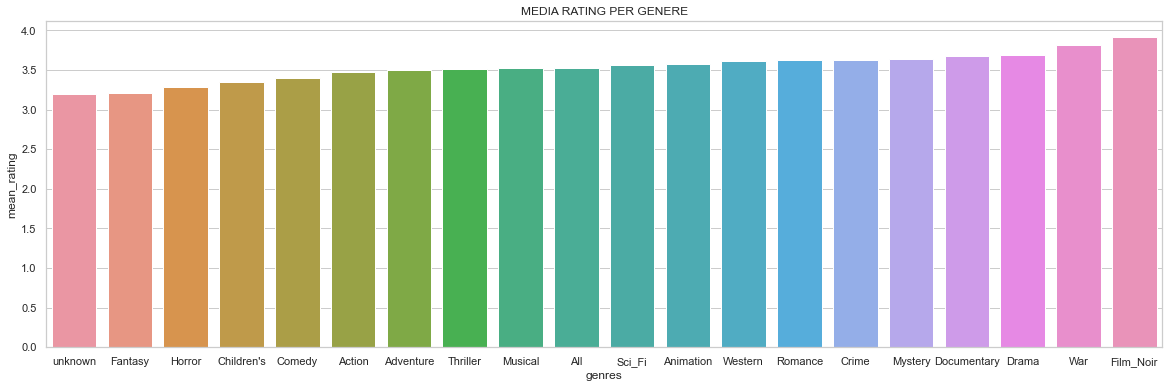

In [25]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="genres", y="mean_rating", data=df_genre_mean_rating.sort_values("mean_rating"))
fig = plt.gcf()
fig.set_size_inches(20, 6)
plt.title("MEDIA RATING PER GENERE")

# Non si evidenzia una grossa differenza in base al genere

Text(0.5, 1.0, 'NUMERO DI VALUTAZIONI PER GENERE')

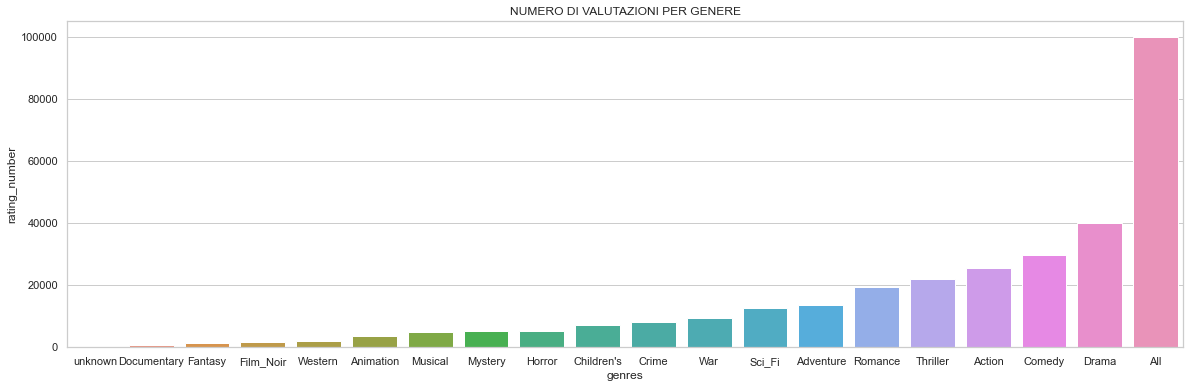

In [26]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="genres", y="rating_number", data=df_genre_mean_rating.sort_values("rating_number"))
fig = plt.gcf()
fig.set_size_inches(20, 6)
plt.title("NUMERO DI VALUTAZIONI PER GENERE")

Text(0.5, 1.0, 'NUMERO DI FILM PER OGNI GENERE')

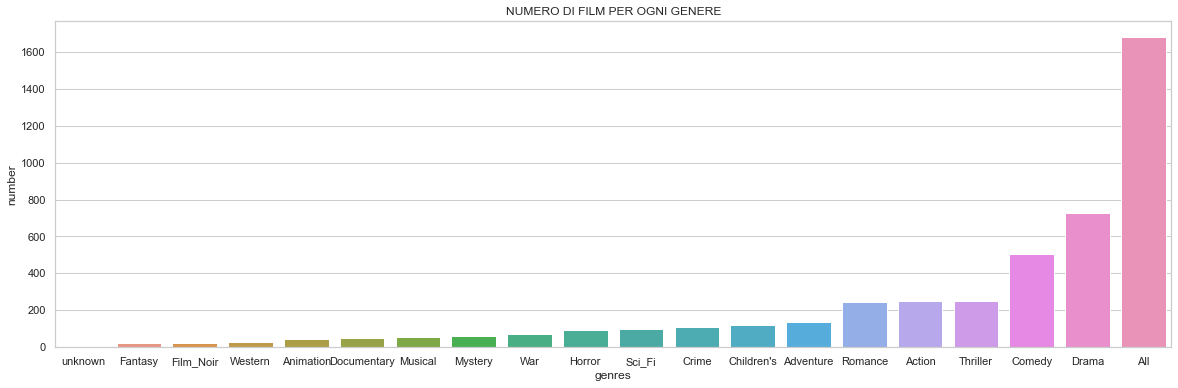

In [27]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="genres", y="number", data=df_genre_mean_rating.sort_values("number"))
fig = plt.gcf()
fig.set_size_inches(20, 6)
plt.title("NUMERO DI FILM PER OGNI GENERE")

Text(0.5, 1.0, "FILM PIU' VALUTATI")

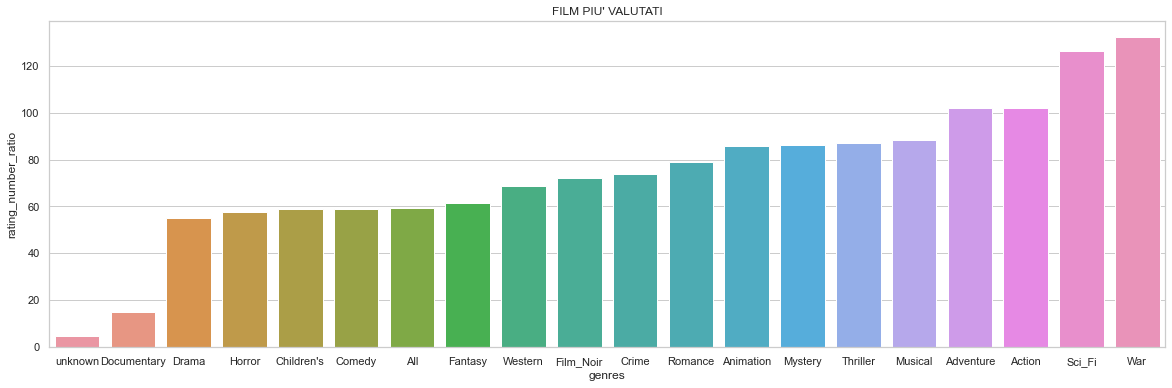

In [28]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="genres", y="rating_number_ratio", data=df_genre_mean_rating.sort_values("rating_number_ratio"))
fig = plt.gcf()
fig.set_size_inches(20, 6)
plt.title("FILM PIU' VALUTATI")

In [29]:
merged_df = pd.merge(merged_df, user_df, left_on='user', right_on='user_id')
merged_df.head()

,user,item,rating,timestamp,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,...,Romance,Sci_Fi,Thriller,War,Western,user_id,age,gender,occupation,zip_code
0,196,242,3,881250949,242,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,...,0,0,0,0,0,196,49,M,writer,55105
1,196,257,2,881251577,257,Men in Black (1997),04-Jul-1997,NaN,http://us.imdb.com/M/title-exact?Men+in+Black+...,0,...,0,1,0,0,0,196,49,M,writer,55105
2,196,111,4,881251793,111,"Truth About Cats & Dogs, The (1996)",26-Apr-1996,NaN,http://us.imdb.com/M/title-exact?Truth%20About...,0,...,1,0,0,0,0,196,49,M,writer,55105
3,196,25,4,881251955,25,"Birdcage, The (1996)",08-Mar-1996,NaN,"http://us.imdb.com/M/title-exact?Birdcage,%20T...",0,...,0,0,0,0,0,196,49,M,writer,55105
4,196,382,4,881251843,382,"Adventures of Priscilla, Queen of the Desert, ...",01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Adventures%20...,0,...,0,0,0,0,0,196,49,M,writer,55105


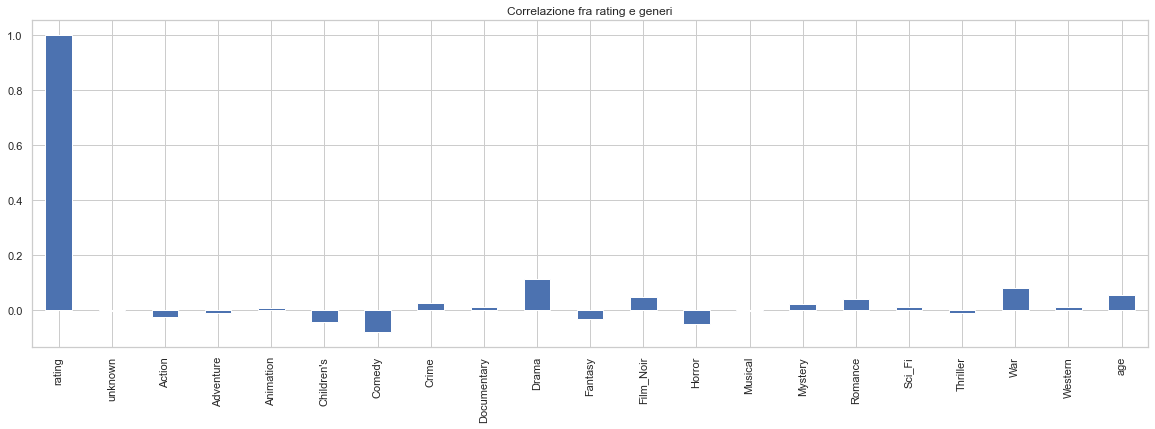

In [126]:
corr_columns = ["rating", "unknown","Action","Adventure","Animation",
"Children's","Comedy","Crime","Documentary","Drama","Fantasy",
"Film_Noir","Horror","Musical","Mystery","Romance","Sci_Fi",
"Thriller","War","Western", "age"]

merged_df[corr_columns].corr(method='pearson')['rating'][:].plot(kind='bar')
plt.title("Correlazione fra rating e generi")
fig = plt.gcf()
fig.set_size_inches(20, 6)

# Nessuna correlazione significatica fra rating e le altre colonne

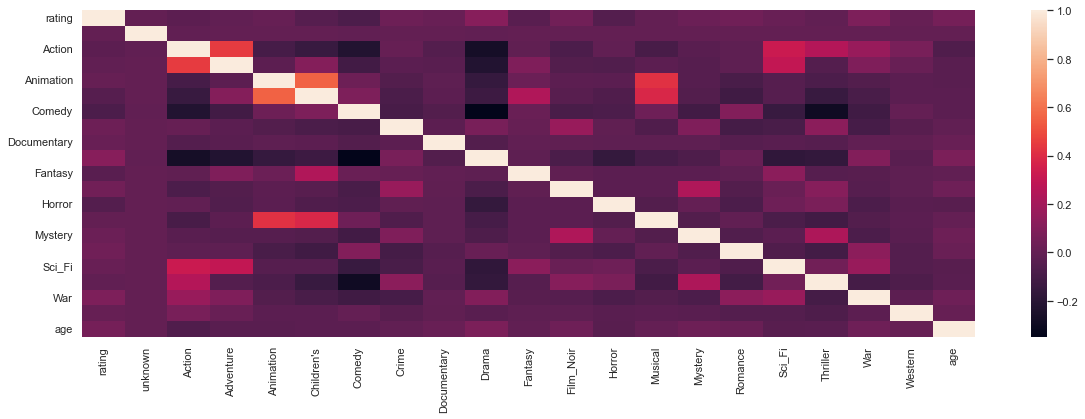

In [31]:


sns.heatmap(merged_df[corr_columns].corr(method='pearson'))
fig = plt.gcf()
fig.set_size_inches(20, 6)

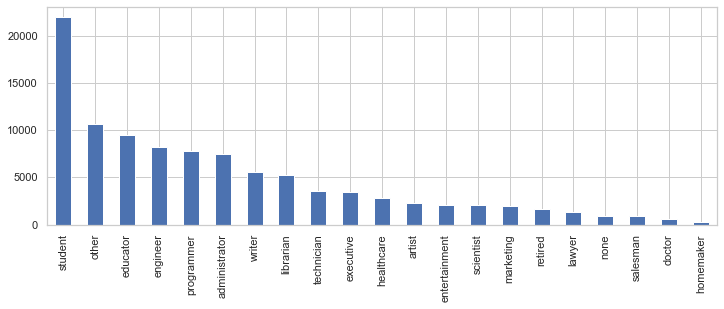

In [32]:
merged_df.occupation.value_counts().sort_values(ascending=False).plot(kind='bar')
fig = plt.gcf()
fig.set_size_inches(12, 4)

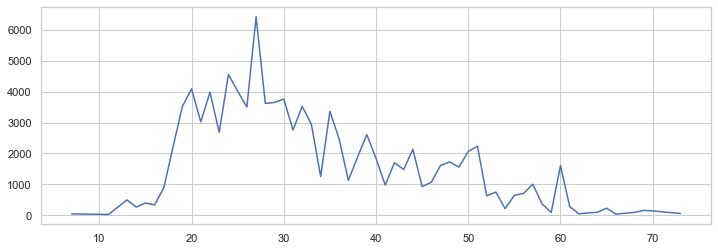

In [33]:
merged_df.age.value_counts().sort_index(ascending=True).plot(kind='line')
fig = plt.gcf()
fig.set_size_inches(12, 4)

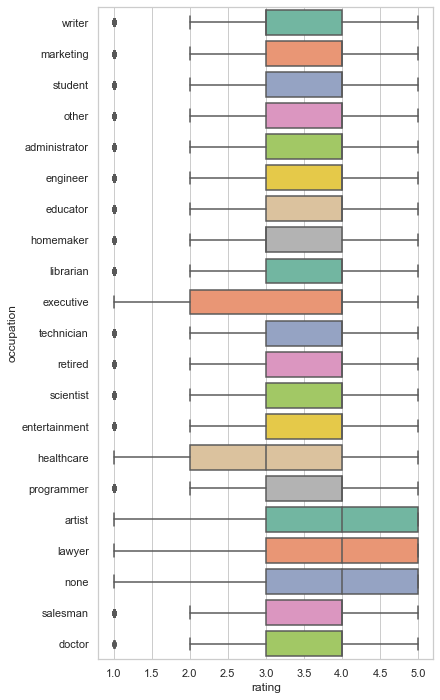

In [34]:
ax = sns.boxplot(x="rating", y="occupation", data=merged_df, orient="h", palette='Set2')

fig = plt.gcf()
fig.set_size_inches(6, 12)

In [35]:
def get_age_range(age):
    
    if age <= 13:
        return "children"
    elif age > 13 and age < 19:
        return "teenager"
    elif age >= 19 and age < 24:
        return "young-adult"
    elif age >= 25 and age < 35:
        return "adult"
    elif age >= 35 and age < 45:
        return "middle-age"
    elif age >= 45 and age < 65:
        return "old-adult"
    else:
        return "old"


merged_df["age_range"] = merged_df.age.apply(lambda x: get_age_range(x))

merged_df.head()

,user,item,rating,timestamp,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,...,Sci_Fi,Thriller,War,Western,user_id,age,gender,occupation,zip_code,age_range
0,196,242,3,881250949,242,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,...,0,0,0,0,196,49,M,writer,55105,old-adult
1,196,257,2,881251577,257,Men in Black (1997),04-Jul-1997,NaN,http://us.imdb.com/M/title-exact?Men+in+Black+...,0,...,1,0,0,0,196,49,M,writer,55105,old-adult
2,196,111,4,881251793,111,"Truth About Cats & Dogs, The (1996)",26-Apr-1996,NaN,http://us.imdb.com/M/title-exact?Truth%20About...,0,...,0,0,0,0,196,49,M,writer,55105,old-adult
3,196,25,4,881251955,25,"Birdcage, The (1996)",08-Mar-1996,NaN,"http://us.imdb.com/M/title-exact?Birdcage,%20T...",0,...,0,0,0,0,196,49,M,writer,55105,old-adult
4,196,382,4,881251843,382,"Adventures of Priscilla, Queen of the Desert, ...",01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Adventures%20...,0,...,0,0,0,0,196,49,M,writer,55105,old-adult


In [98]:
def get_sentiment(rating):
    if rating > 3:
        return "Top"
    elif rating == 3:
        return "Like"
    else:
        return "Dislike"

merged_df["sentiment"] = merged_df.rating.apply(lambda x: get_sentiment(x))

merged_df.head()

,user,item,rating,timestamp,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,...,user_id,age,gender,occupation,zip_code,age_range,sentiment,genre,review_number,user_review_number
0,196,242,3,881250949,242,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,...,196,49,M,writer,55105,old-adult,Like,Comedy,117,39
1,196,257,2,881251577,257,Men in Black (1997),04-Jul-1997,NaN,http://us.imdb.com/M/title-exact?Men+in+Black+...,0,...,196,49,M,writer,55105,old-adult,Dislike,Action_Adventure_Comedy_Sci_Fi,303,39
2,196,111,4,881251793,111,"Truth About Cats & Dogs, The (1996)",26-Apr-1996,NaN,http://us.imdb.com/M/title-exact?Truth%20About...,0,...,196,49,M,writer,55105,old-adult,Top,Comedy_Romance,272,39
3,196,25,4,881251955,25,"Birdcage, The (1996)",08-Mar-1996,NaN,"http://us.imdb.com/M/title-exact?Birdcage,%20T...",0,...,196,49,M,writer,55105,old-adult,Top,Comedy,293,39
4,196,382,4,881251843,382,"Adventures of Priscilla, Queen of the Desert, ...",01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Adventures%20...,0,...,196,49,M,writer,55105,old-adult,Top,Comedy_Drama,111,39


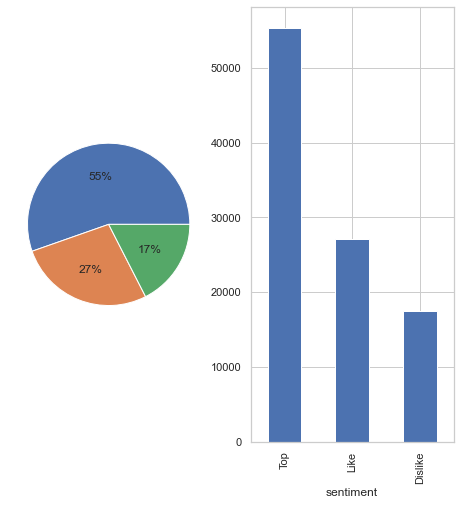

In [100]:
plt.subplot(1, 2, 1) # row 1, col 2 index 1
#merged_df.value_counts("gender").plot.pie(figsize=(8, 8))
plt.pie(merged_df.value_counts("sentiment"),  autopct='%.0f%%')

plt.subplot(1, 2, 2) # index 2
merged_df.value_counts("sentiment").plot.bar(figsize=(8, 8))

plt.subplot(1, 2, 5) # index 2
merged_df.rating.order_value().plot.bar(figsize=(8, 8))

plt.show()


# Sarà più facile escludere che consigliare

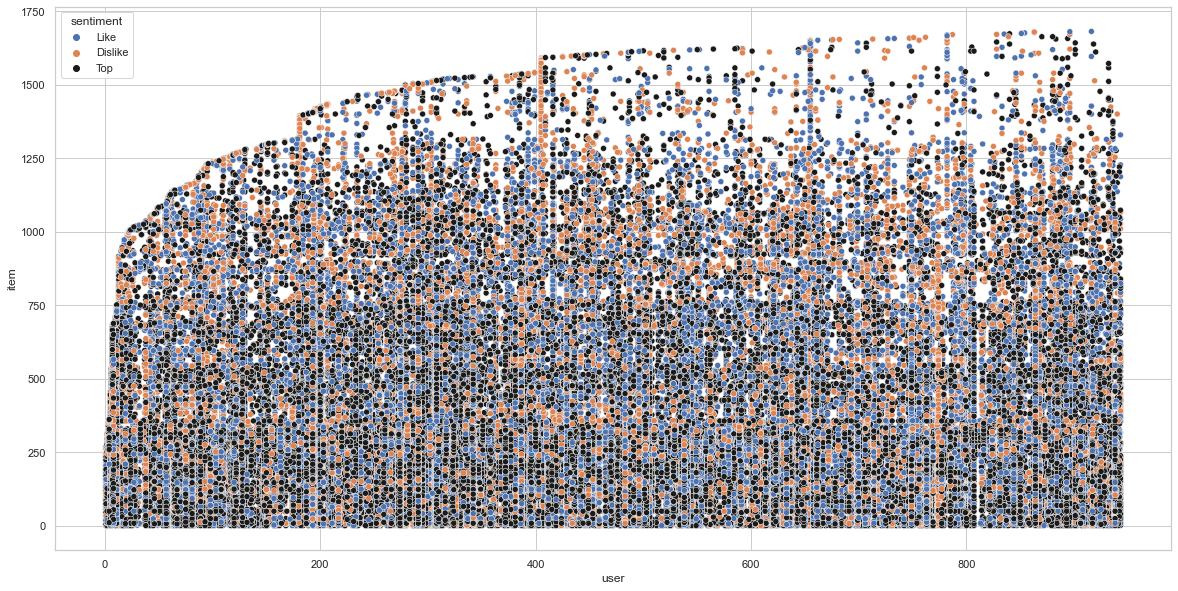

In [99]:
markers = {"Top": "s", "Dislike": "X", "Neutral": "o"}

sns.scatterplot(data=merged_df, x="user", y="item", hue="sentiment", palette=["C0", "C1", "k"])

fig = plt.gcf()
fig.set_size_inches(20, 10)

In [38]:
genres = ["unknown","Action","Adventure","Animation",
"Children's","Comedy","Crime","Documentary","Drama","Fantasy",
"Film_Noir","Horror","Musical","Mystery","Romance","Sci_Fi",
"Thriller","War","Western"]





        

In [39]:
def get_genre(row):

    genres = ["unknown","Action","Adventure","Animation",
        "Children's","Comedy","Crime","Documentary","Drama","Fantasy",
        "Film_Noir","Horror","Musical","Mystery","Romance","Sci_Fi",
        "Thriller","War","Western"]
    genre_list = []
    for col in genres:
        if row[col] == 1:
            genre_list.append(col)
    
    
    genre = ""
    
    genre_list.sort()
    
    for g in genre_list:
        if genre == "":
            genre += g
        else:
            genre += "_" + g
    
    return genre




merged_df["genre"] = merged_df.apply(lambda row: get_genre(row), axis = 1)

merged_df.head()

,user,item,rating,timestamp,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,...,War,Western,user_id,age,gender,occupation,zip_code,age_range,sentiment,genre
0,196,242,3,881250949,242,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,...,0,0,196,49,M,writer,55105,old-adult,Neutral,Comedy
1,196,257,2,881251577,257,Men in Black (1997),04-Jul-1997,NaN,http://us.imdb.com/M/title-exact?Men+in+Black+...,0,...,0,0,196,49,M,writer,55105,old-adult,Dislike,Action_Adventure_Comedy_Sci_Fi
2,196,111,4,881251793,111,"Truth About Cats & Dogs, The (1996)",26-Apr-1996,NaN,http://us.imdb.com/M/title-exact?Truth%20About...,0,...,0,0,196,49,M,writer,55105,old-adult,Like,Comedy_Romance
3,196,25,4,881251955,25,"Birdcage, The (1996)",08-Mar-1996,NaN,"http://us.imdb.com/M/title-exact?Birdcage,%20T...",0,...,0,0,196,49,M,writer,55105,old-adult,Like,Comedy
4,196,382,4,881251843,382,"Adventures of Priscilla, Queen of the Desert, ...",01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Adventures%20...,0,...,0,0,196,49,M,writer,55105,old-adult,Like,Comedy_Drama


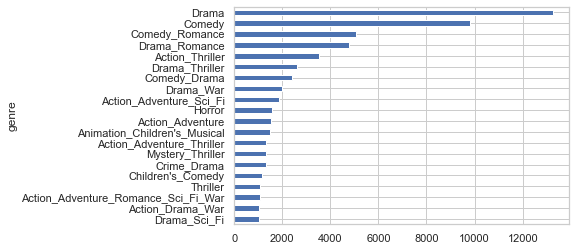

In [40]:
merged_df.groupby("genre").count().item.sort_values(ascending=False)[0:20].plot.barh()
plt.gca().invert_yaxis()

In [41]:
children_genres = {}

df_children_like = merged_df[(merged_df["age_range"] == "children") & (merged_df["sentiment"] == "Like")]

children_genres['genres'] = []

children_genres['item_number'] = []
children_genres['rating_number'] = []
children_genres['rating_number_ratio'] = []

genres = ["unknown","Action","Adventure","Animation",
"Children's","Comedy","Crime","Documentary","Drama","Fantasy",
"Film_Noir","Horror","Musical","Mystery","Romance","Sci_Fi",
"Thriller","War","Western"]



for g in genres:
    selected = df_children_like[df_children_like[g] == 1]
    
    children_genres['genres'].append(g)

    children_genres['item_number'].append(selected.item.nunique())
    children_genres['rating_number'].append(selected.item.count())
    children_genres['rating_number_ratio'].append(selected.item.count()/selected.item.nunique())

df_children_genres_rating = pd.DataFrame(data=children_genres)  
df_children_genres_rating.head()

C:\Users\samue\AppData\Local\Temp/ipykernel_2776/1670552972.py:25: RuntimeWarning: invalid value encountered in longlong_scalars
  children_genres['rating_number_ratio'].append(selected.item.count()/selected.item.nunique())


,genres,item_number,rating_number,rating_number_ratio
0,unknown,0,0,NaN
1,Action,73,97,1.328767
2,Adventure,25,42,1.680000
3,Animation,14,17,1.214286
4,Children's,25,30,1.200000


Text(0.5, 1.0, "FILM PIU' VALUTATI")

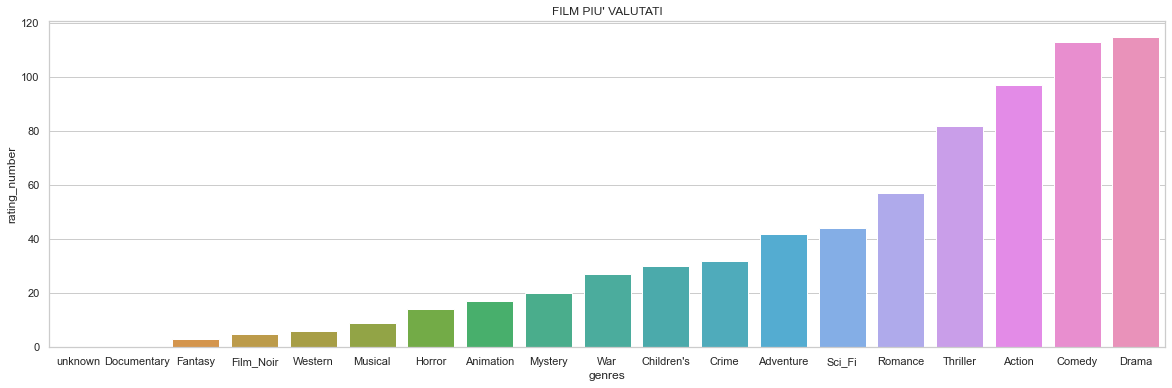

In [42]:



sns.set_theme(style="whitegrid")
ax = sns.barplot(x="genres", y="rating_number",  data=df_children_genres_rating.sort_values("rating_number"))
fig = plt.gcf()
fig.set_size_inches(20, 6)
plt.title("FILM PIU' VALUTATI")

Text(0.5, 1.0, "FILM PIU' VALUTATI DALLA FASCIA CHILDREN IN RAPPORTO AL NUMERO DI FILM PER CATEGORIA")

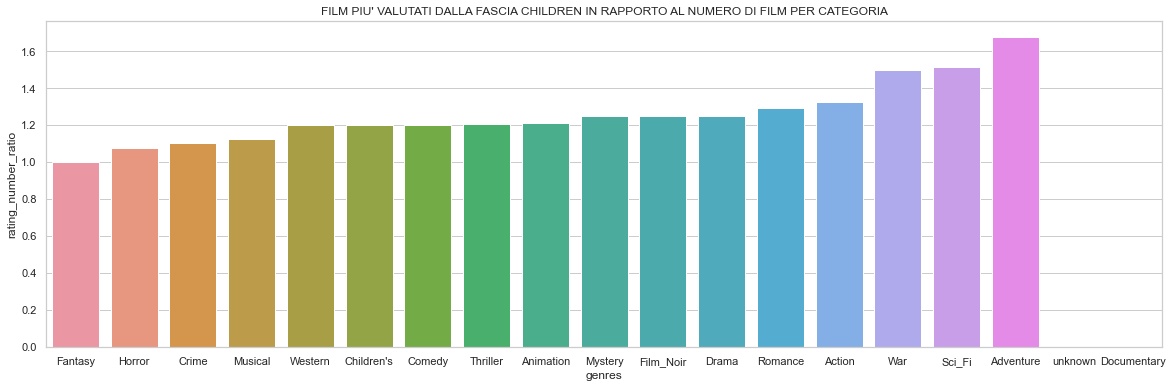

In [43]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="genres", y="rating_number_ratio",  data=df_children_genres_rating.sort_values("rating_number_ratio"))
fig = plt.gcf()
fig.set_size_inches(20, 6)
plt.title("FILM PIU' VALUTATI DALLA FASCIA CHILDREN IN RAPPORTO AL NUMERO DI FILM PER CATEGORIA")

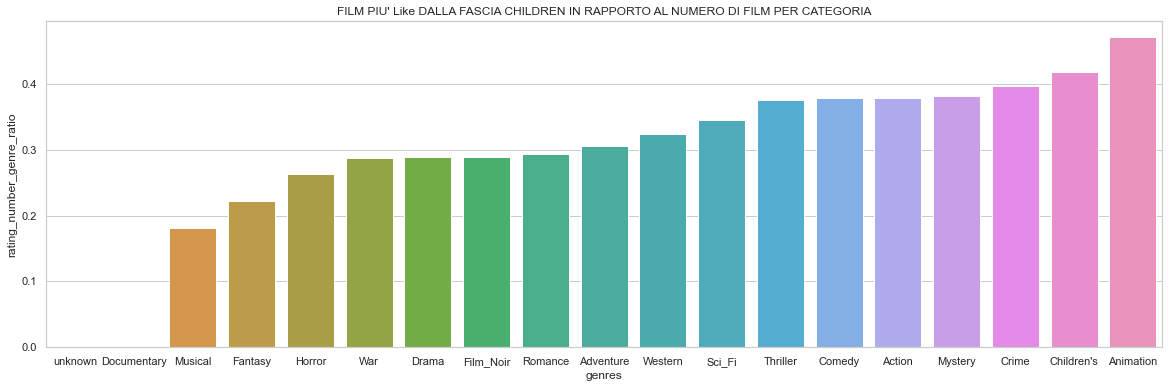

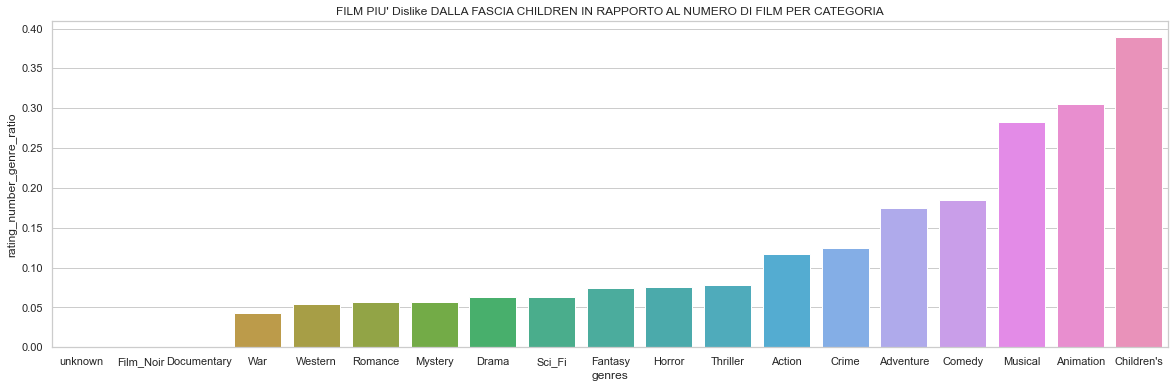

<Figure size 432x288 with 0 Axes>

In [44]:
for sentiment in ["Like", "Dislike"]:


    children_genres = {}

    df_children_like = merged_df[(merged_df["age_range"] == "children") & (merged_df["sentiment"] == sentiment)]

    children_genres['genres'] = []

    children_genres['tot_number_genre'] = []
    children_genres['rating_number'] = []
    children_genres['rating_number_genre_ratio'] = []

    genres = ["unknown","Action","Adventure","Animation",
    "Children's","Comedy","Crime","Documentary","Drama","Fantasy",
    "Film_Noir","Horror","Musical","Mystery","Romance","Sci_Fi",
    "Thriller","War","Western"]



    for g in genres:
        
        tot_number_genre = merged_df[merged_df[g] == 1].item.count()
        
        selected = df_children_like[df_children_like[g] == 1]

        children_genres['genres'].append(g)
        
        children_genres['tot_number_genre'] = tot_number_genre
        
        children_genres['rating_number'].append(selected.item.count())
        
        children_genres['rating_number_genre_ratio'].append((selected.item.count()/tot_number_genre)*100)

    df_children_genres_rating = pd.DataFrame(data=children_genres)  
    df_children_genres_rating.head()
    
    sns.set_theme(style="whitegrid")
    ax = sns.barplot(x="genres", y="rating_number_genre_ratio",  data=df_children_genres_rating.sort_values("rating_number_genre_ratio"))
    fig = plt.gcf()
    fig.set_size_inches(20, 6)
    plt.title(f"FILM PIU' {sentiment} DALLA FASCIA CHILDREN IN RAPPORTO AL NUMERO DI FILM PER CATEGORIA")
    plt.figure()

plt.show()

In [45]:
merged_df.columns

Index(['user', 'item', 'rating', 'timestamp', 'movie_id', 'movie_title',
       'release_date', 'video_release_date', 'IMDb_URL', 'unknown', 'Action',
       'Adventure', 'Animation', 'Children's', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Film_Noir', 'Horror', 'Musical',
       'Mystery', 'Romance', 'Sci_Fi', 'Thriller', 'War', 'Western', 'user_id',
       'age', 'gender', 'occupation', 'zip_code', 'age_range', 'sentiment',
       'genre'],
      dtype='object')

Text(0.5, 1.0, 'CORRELAZIONE FRA I GENERI FILMATOGRAFICI')

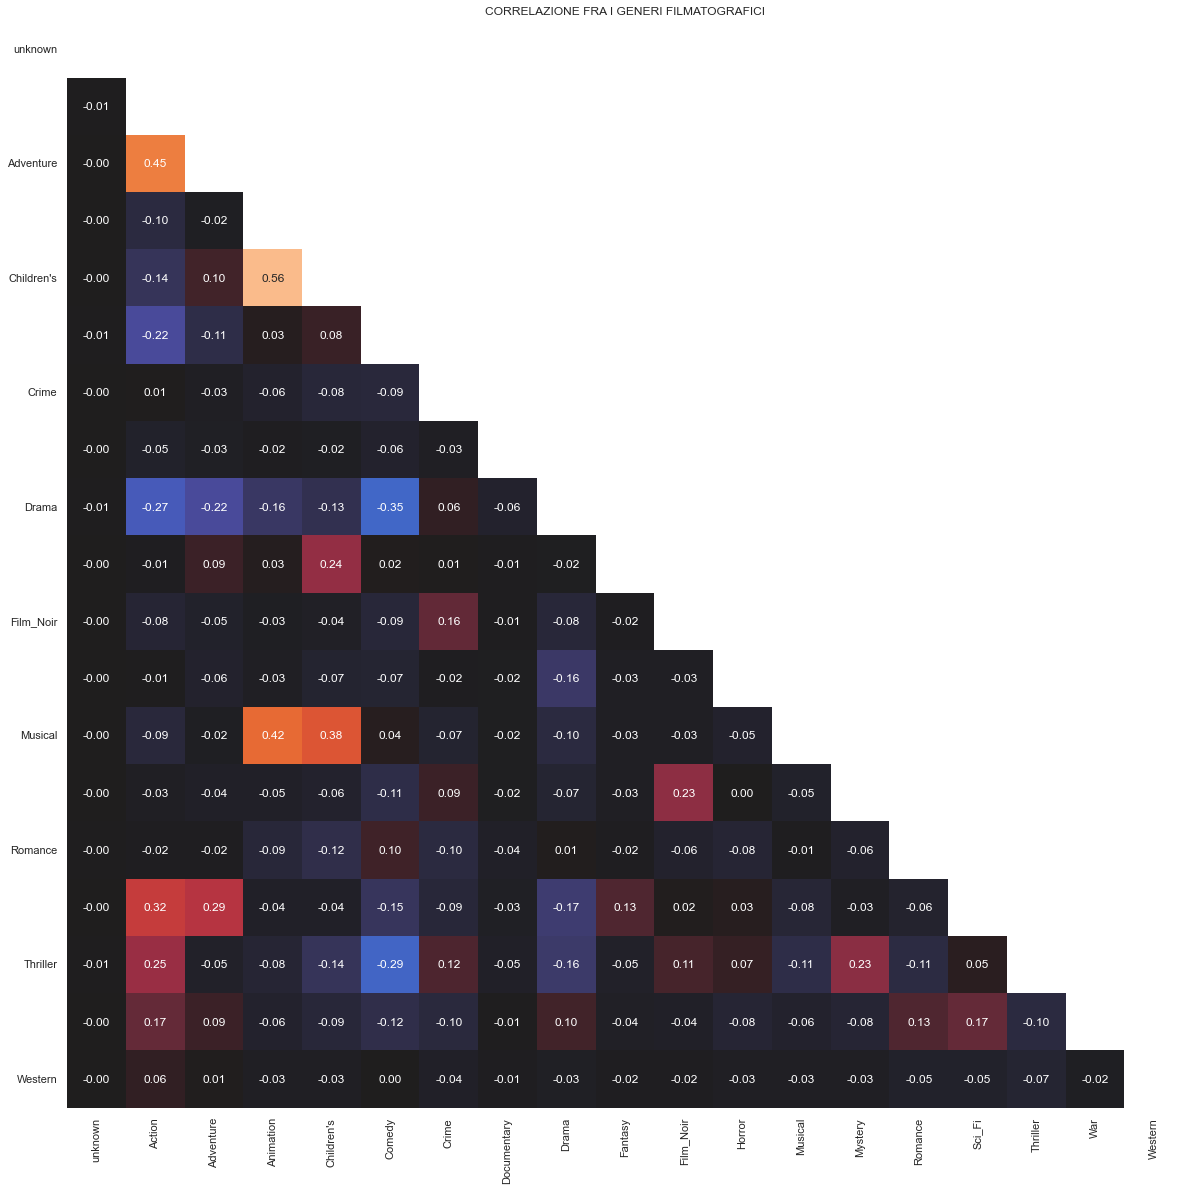

In [46]:
col = ["unknown", "Action",
       "Adventure", "Animation", "Children's", "Comedy", "Crime",
       "Documentary", "Drama", "Fantasy", "Film_Noir", "Horror", "Musical",
       "Mystery", "Romance", "Sci_Fi", "Thriller", "War", "Western"]


sns.heatmap(merged_df[col].corr(),
            vmin=-0.3,
            vmax=0.6,
            center=0,
            annot=True,
            fmt='.2f',
            mask=~np.tri(merged_df[col].corr().shape[1], k=-1, dtype=bool),
            cbar=False)
 
fig = plt.gcf()
fig.set_size_inches(20, 20)

plt.title("CORRELAZIONE FRA I GENERI FILMATOGRAFICI")

['Adventure', 'Action', "Children's", 'Musical', 'Animation', 'Animation']


Text(0.5, 1.0, 'GENERI CON CORRELAZIONE ASSOLUTA MAGGIORE DI 0.4')

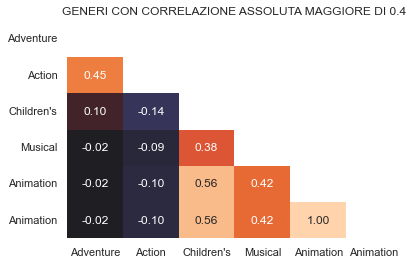

In [47]:
col = ["unknown", "Action",
       "Adventure", "Animation", "Children's", "Comedy", "Crime",
       "Documentary", "Drama", "Fantasy", "Film_Noir", "Horror", "Musical",
       "Mystery", "Romance", "Sci_Fi", "Thriller", "War", "Western"]


gen_corr = [] # , hue="sentiment", palette=["C0", "C1", "k"]

for index, row in merged_df[col].corr().iterrows():
    for c in col:
        if (row[c] >= 0.4 and row[c] < 1) or (row[c] <= -0.4 and row[c] > -1):
            gen_corr.append(c)
            




print(gen_corr)
sns.heatmap(merged_df[gen_corr].corr(),
            vmin=-0.3,
            vmax=0.6,
            center=0,
            annot=True,
            fmt='.2f',
            mask=~np.tri(merged_df[gen_corr].corr().shape[1], k=-1, dtype=bool),
            cbar=False)

plt.title("GENERI CON CORRELAZIONE ASSOLUTA MAGGIORE DI 0.4")

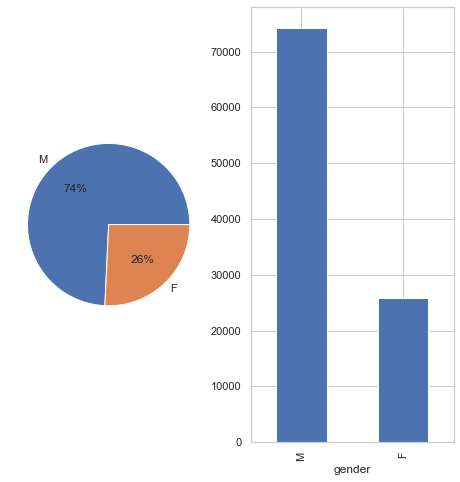

In [48]:


plt.subplot(1, 2, 1) # row 1, col 2 index 1
#merged_df.value_counts("gender").plot.pie(figsize=(8, 8))
plt.pie(merged_df.value_counts("gender"), labels= merged_df.gender.unique(), autopct='%.0f%%')

plt.subplot(1, 2, 2) # index 2
merged_df.value_counts("gender").plot.bar(figsize=(8, 8))

plt.show()

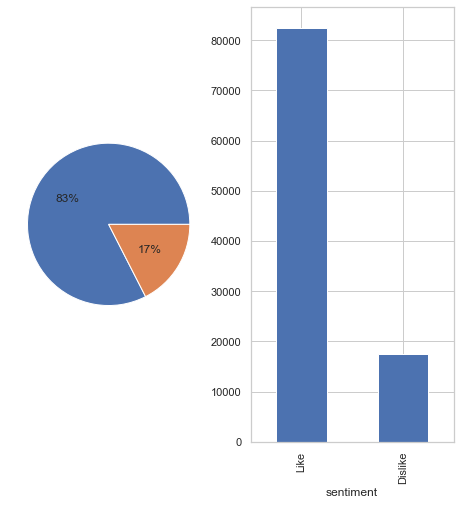

In [97]:
plt.subplot(1, 2, 1) # row 1, col 2 index 1
#merged_df.value_counts("gender").plot.pie(figsize=(8, 8))
plt.pie(merged_df.value_counts("sentiment"),  autopct='%.0f%%')

plt.subplot(1, 2, 2) # index 2
merged_df.value_counts("sentiment").plot.bar(figsize=(8, 8))

plt.show()

In [50]:
item_df = item_df.set_index("movie_id")

In [51]:
ten_popular_movies_id = merged_df[merged_df["rating"] == 5].value_counts("item").sort_values(ascending=False).head(10).index

print(ten_popular_movies_id)

item_df.head()

item_df.iloc[ten_popular_movies_id].movie_title

Int64Index([50, 100, 127, 174, 56, 318, 98, 313, 172, 181], dtype='int64', name='item')


movie_id
51                      Legends of the Fall (1994)
101                             Heavy Metal (1981)
128                                Supercop (1992)
175                                  Brazil (1985)
57                                   Priest (1994)
319                Everyone Says I Love You (1996)
99          Snow White and the Seven Dwarfs (1937)
314    3 Ninjas: High Noon At Mega Mountain (1998)
173                     Princess Bride, The (1987)
182                              GoodFellas (1990)
Name: movie_title, dtype: object

In [52]:
ten_baddest_movie = merged_df[merged_df["rating"] == 1].value_counts("item").sort_values(ascending=False).head(10).index

print(ten_baddest_movie)

item_df.head()

item_df.iloc[ten_baddest_movie].movie_title

Int64Index([294, 289, 325, 243, 240, 235, 288, 260, 748, 286], dtype='int64', name='item')


movie_id
295                    Breakdown (1997)
290             Fierce Creatures (1997)
326                    G.I. Jane (1997)
244       Smilla's Sense of Snow (1997)
241    Last of the Mohicans, The (1992)
236                 Citizen Ruth (1996)
289                        Evita (1996)
261                      Air Bud (1997)
749              MatchMaker, The (1997)
287                Marvin's Room (1996)
Name: movie_title, dtype: object

In [53]:
grouped_item = merged_df.groupby("item").count()

def get_review_number(id):
    
    return grouped_item.loc[id].user
    




merged_df["review_number"] = merged_df.item.apply(lambda id: get_review_number(id))

merged_df["review_number"]

0        117
1        303
2        272
3        293
4        111
        ... 
99995    350
99996    175
99997     27
99998    143
99999     52
Name: review_number, Length: 100000, dtype: int64

In [54]:
merged_df[merged_df["item"] == 1][["item", "user", "review_number"]]

,item,user,review_number
43,1,63,452
270,1,296,452
444,1,271,452
721,1,201,452
1097,1,209,452
...,...,...,...
97462,1,789,452
97495,1,785,452
97522,1,609,452
97550,1,412,452


In [55]:
grouped_user = merged_df.groupby("user").count()

def get_user_review_number(id):
    
    return grouped_user.loc[id].user_id
    




merged_df["user_review_number"] = merged_df.user_id.apply(lambda id: get_user_review_number(id))

merged_df[["item", "user", "review_number", "user_review_number"]]

,item,user,review_number,user_review_number
0,242,196,117,39
1,257,196,303,39
2,111,196,272,39
3,25,196,293,39
4,382,196,111,39
...,...,...,...,...
99995,313,873,350,20
99996,326,873,175,20
99997,348,873,27,20
99998,358,873,143,20


In [56]:
merged_df[["item", "user", "review_number", "user_review_number"]]

,item,user,review_number,user_review_number
0,242,196,117,39
1,257,196,303,39
2,111,196,272,39
3,25,196,293,39
4,382,196,111,39
...,...,...,...,...
99995,313,873,350,20
99996,326,873,175,20
99997,348,873,27,20
99998,358,873,143,20


In [61]:
merged_df.columns

Index(['user', 'item', 'rating', 'timestamp', 'movie_id', 'movie_title',
       'release_date', 'video_release_date', 'IMDb_URL', 'unknown', 'Action',
       'Adventure', 'Animation', 'Children's', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Film_Noir', 'Horror', 'Musical',
       'Mystery', 'Romance', 'Sci_Fi', 'Thriller', 'War', 'Western', 'user_id',
       'age', 'gender', 'occupation', 'zip_code', 'age_range', 'sentiment',
       'genre', 'review_number', 'user_review_number'],
      dtype='object')

In [70]:
merged_df[merged_df['movie_title'].str.contains("ape")]

,user,item,rating,timestamp,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,...,user_id,age,gender,occupation,zip_code,age_range,sentiment,genre,review_number,user_review_number
225,154,708,4,879139003,708,"Sex, Lies, and Videotape (1989)",01-Jan-1989,NaN,"http://us.imdb.com/M/title-exact?sex,%20lies,%...",0,...,154,25,M,student,53703,adult,Like,Drama,101,51
521,271,65,3,885849419,65,What's Eating Gilbert Grape (1993),01-Jan-1993,NaN,http://us.imdb.com/M/title-exact?What's%20Eati...,0,...,271,51,M,engineer,22932,old-adult,Neutral,Comedy_Drama,115,278
523,271,218,3,885849087,218,Cape Fear (1991),01-Jan-1991,NaN,http://us.imdb.com/M/title-exact?Cape%20Fear%2...,0,...,271,51,M,engineer,22932,old-adult,Neutral,Thriller,171,278
530,271,520,5,885848615,520,"Great Escape, The (1963)",01-Jan-1963,NaN,http://us.imdb.com/M/title-exact?Great%20Escap...,0,...,271,51,M,engineer,22932,old-adult,Like,Adventure_War,124,278
624,271,1133,3,885849536,1133,Escape to Witch Mountain (1975),01-Jan-1975,NaN,http://us.imdb.com/M/title-exact?Escape%20to%2...,0,...,271,51,M,engineer,22932,old-adult,Neutral,Adventure_Children's_Fantasy,30,278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98148,814,218,3,885411030,218,Cape Fear (1991),01-Jan-1991,NaN,http://us.imdb.com/M/title-exact?Cape%20Fear%2...,0,...,814,30,M,other,12345,adult,Neutral,Thriller,171,35
98193,372,218,5,876869481,218,Cape Fear (1991),01-Jan-1991,NaN,http://us.imdb.com/M/title-exact?Cape%20Fear%2...,0,...,372,25,F,student,66046,adult,Like,Thriller,171,66
98328,333,520,4,891045117,520,"Great Escape, The (1963)",01-Jan-1963,NaN,http://us.imdb.com/M/title-exact?Great%20Escap...,0,...,333,47,M,other,V0R2M,old-adult,Like,Adventure_War,124,26
98445,925,218,4,884717862,218,Cape Fear (1991),01-Jan-1991,NaN,http://us.imdb.com/M/title-exact?Cape%20Fear%2...,0,...,925,18,F,salesman,49036,teenager,Like,Thriller,171,32


In [ ]:
def get_rating_score(rating):
    if rating == 5:
        return 3
    elif rating == 4:
        return 2
    elif rating == 3:
        return 1
    elif rating == 2:
        return -2
    else:
        return -3

merged_df["score"] = merged_df.rating.apply(lambda x: get_rating_score(x))

merged_df.head()

In [145]:
genres = ["unknown","Action","Adventure","Animation",
"Children's","Comedy","Crime","Documentary","Drama","Fantasy",
"Film_Noir","Horror","Musical","Mystery","Romance","Sci_Fi",
"Thriller","War","Western"]



children_like_genres = {}



# DATAFRAMES:
children_like = merged_df[(merged_df["age_range"] == "children") & (merged_df["sentiment"] == "Top")]
children = merged_df[merged_df["age_range"] == 'children']

NUMBER_OF_CHILDREN_LIKE_REVIEW = children_like.item.count()



# ALL CHILDREN

children_like_genres['genres'] = ["CHILDREN"]

# media rating dei children
children_like_genres['mean_rating'] = [children.rating.mean()]

# media pesata per volume del campione
children_like_genres['mean_rating_weighted'] = [children.rating.mean()*children.item.count()/children.item.count()]

#children_like_genres['unique_movie_number'] = [children.item.nunique()]

# numero di like review dei children (tutti i generi)
children_like_genres['rating_number_liked'] = [children_like.item.count()]


# tot numero di rating dei children (all sentiment, all genres)
children_like_genres['rating_number'] = [children.item.count()]

# rating like (all generi) / rating tot (all generi)
children_like_genres['rating_number_like_ratio'] = [children_like.item.count()/NUMBER_OF_CHILDREN_LIKE_REVIEW/children.item.count()]


children_like_genres['score_sum'] = [children.score.sum()]



# FOR GENRE:

for g in genres:
    children_like_genre = children_like[children_like[g] == 1]   
    
    childred_genre = children[children[g] == 1]
    
    
    children_like_genres['genres'].append(g)    
    
    # media rating dei children per il genere
    children_like_genres['mean_rating'].append(childred_genre.rating.mean())
    
    
    # media pesata per volume del campione
    children_like_genres['mean_rating_weighted'].append(childred_genre.rating.mean()*childred_genre.item.count()/children.item.count())
    
    # numero di item univoci per genere
    # children_like_genres['unique_movie_number'].append(childred_genre.item.nunique())
    
    
    # numero di rating like per genere
    children_like_genres['rating_number_liked'].append(children_like_genre.item.count())
    
    # tot numero di rating per genere
    children_like_genres['rating_number'].append(childred_genre.item.count())
    
    # rating like / rating tot per genere
    children_like_genres['rating_number_like_ratio'].append(children_like_genre.item.count()/NUMBER_OF_CHILDREN_LIKE_REVIEW/childred_genre.item.count())

    # sum degli score:
    children_like_genres['score_sum'].append(childred_genre.score.sum())
    
    
df_children_genre = pd.DataFrame(data=children_like_genres)  
df_children_genre.head()

C:\Users\samue\AppData\Local\Temp/ipykernel_2776/1667207051.py:75: RuntimeWarning: invalid value encountered in double_scalars
  children_like_genres['rating_number_like_ratio'].append(children_like_genre.item.count()/NUMBER_OF_CHILDREN_LIKE_REVIEW/childred_genre.item.count())


,genres,mean_rating,mean_rating_weighted,rating_number_liked,rating_number,rating_number_like_ratio,score_sum
0,CHILDREN,3.463211,3.463211,316,598,0.001672,651
1,unknown,NaN,NaN,0,0,NaN,0
2,Action,3.483871,1.083612,97,186,0.001650,216
3,Adventure,3.282828,0.543478,42,99,0.001343,79
4,Animation,3.083333,0.185619,17,36,0.001494,17


Text(0.5, 1.0, 'MEDIA RATING CHILDREN PER GENERI')

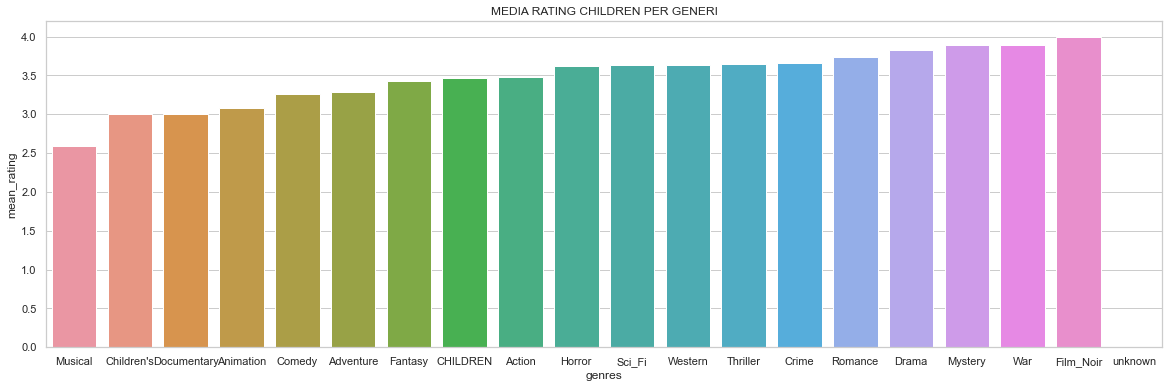

In [77]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="genres", y="mean_rating",  data=df_children_genre.sort_values("mean_rating"))
fig = plt.gcf()
fig.set_size_inches(20, 6)
plt.title("MEDIA RATING CHILDREN PER GENERI")

Text(0.5, 1.0, 'NUMERO DI RATING ESPRESSO DAI CHILDREN PER GENERI')

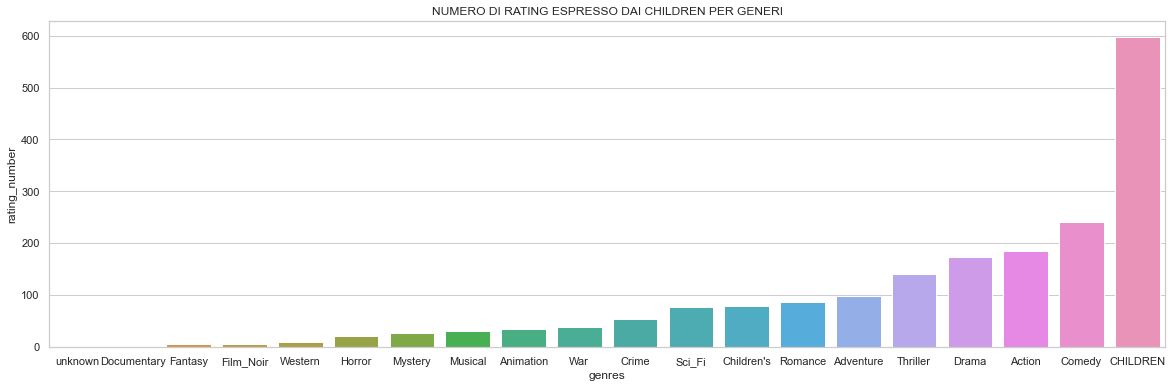

In [80]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="genres", y="rating_number",  data=df_children_genre.sort_values("rating_number"))
fig = plt.gcf()
fig.set_size_inches(20, 6)
plt.title("NUMERO DI RATING ESPRESSO DAI CHILDREN PER GENERI")



# Notiamo come i film noir, war e mistery pur avendo la media di rating più alti sono poco rappresentativi dei children
# I FILM DRAMA SEMBREREBBERO ESSERE UN BUON RIFERIMENTO INVECE

Text(0.5, 1.0, 'MEDIA PESATA RATING CHILDREN PER GENERI')

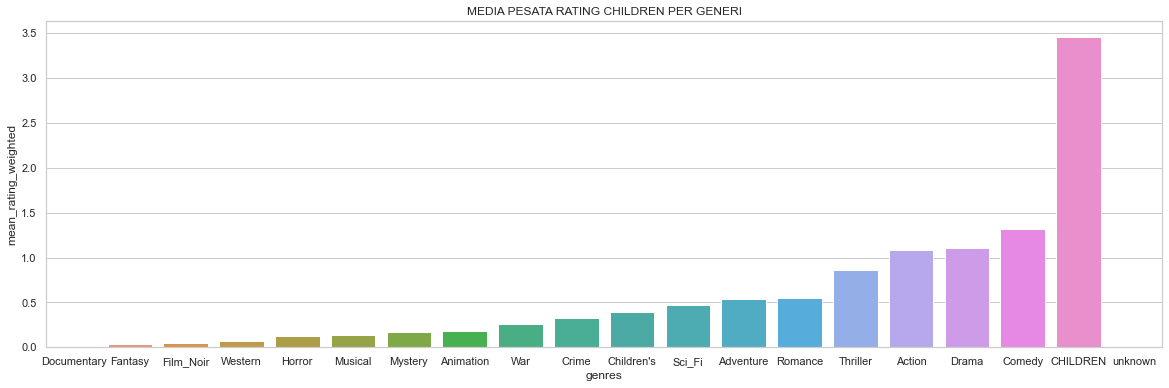

In [146]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="genres", y="mean_rating_weighted",  data=df_children_genre.sort_values("mean_rating_weighted"))
fig = plt.gcf()
fig.set_size_inches(20, 6)
plt.title("MEDIA PESATA RATING CHILDREN PER GENERI")

Text(0.5, 1.0, 'RAPPORTO NUMERO DI LIKE PER NUMERO TOT DI REVIEW PER GENERI')

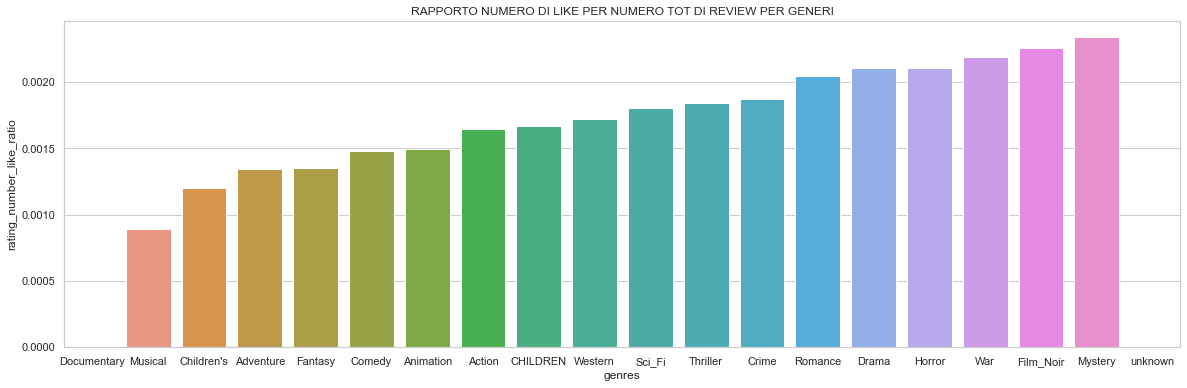

In [143]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="genres", y="rating_number_like_ratio",  data=df_children_genre.sort_values("rating_number_like_ratio"))
fig = plt.gcf()
fig.set_size_inches(20, 6)
plt.title("RAPPORTO NUMERO DI LIKE PER NUMERO TOT DI REVIEW PER GENERI")

Text(0.5, 1.0, 'SCORE PER GENERE')

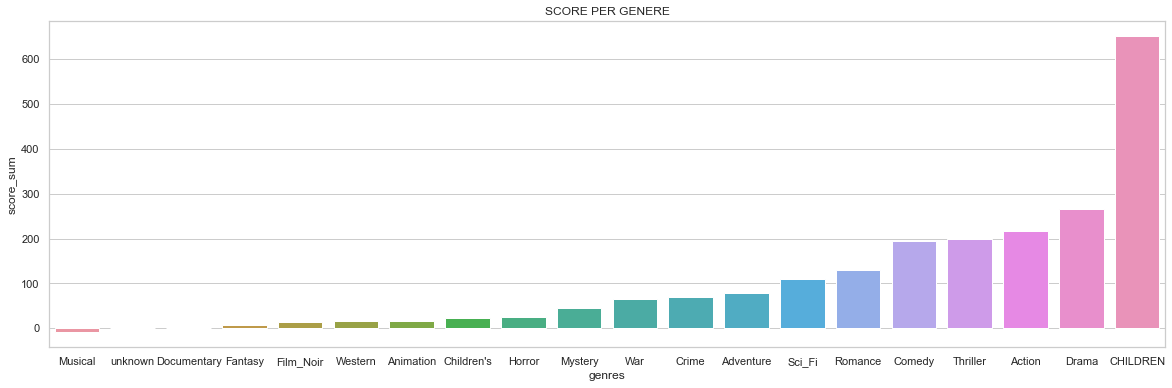

In [144]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="genres", y="score_sum",  data=df_children_genre.sort_values("score_sum"))
fig = plt.gcf()
fig.set_size_inches(20, 6)
plt.title("SCORE PER GENERE")

<AxesSubplot:ylabel='genre'>

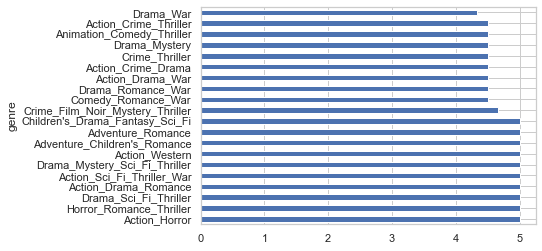

In [129]:
children.groupby("genre").mean().rating.sort_values(ascending=False)[0:20].plot(kind='barh')

<AxesSubplot:ylabel='genre'>

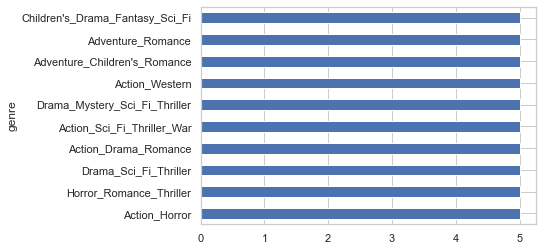

In [130]:
children.groupby("genre").mean().rating.sort_values(ascending=False)[0:10].plot(kind='barh')

In [135]:
top_10_rated = children.groupby("genre").mean().rating.sort_values(ascending=False)[0:10].index

<AxesSubplot:ylabel='genre'>

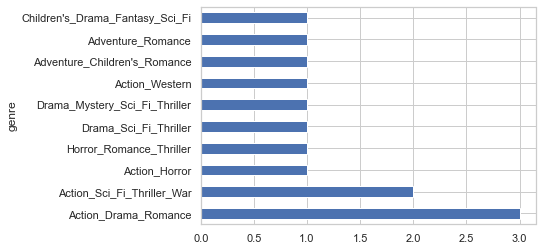

In [137]:
children.groupby("genre").count().loc[top_10_rated].item.sort_values(ascending=False).plot(kind='barh')

In [139]:
children.groupby("genre").count().item.sort_values(ascending=False)[0:20] #.plot(kind='barh')

genre
Comedy                                 90
Drama                                  48
Action_Thriller                        26
Comedy_Romance                         22
Children's_Comedy                      21
Drama_Romance                          16
Animation_Children's_Musical           16
Comedy_Drama                           15
Drama_Thriller                         15
Action_Adventure_Thriller              14
Action_Adventure_Sci_Fi                12
Action                                 10
Drama_Sci_Fi                            8
Action_Adventure_Romance_Sci_Fi_War     8
Action_Adventure                        7
Adventure_Children's                    7
Action_Adventure_Sci_Fi_Thriller        7
Action_Romance_Thriller                 6
Thriller                                6
Animation_Children's_Comedy             6
Name: item, dtype: int64